In [534]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [535]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [536]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [537]:
ticker_list = ["SPY", "AGG"]
# YOUR CODE HERE
IEX_token="pk_072769b0c87041ba9ae6754b44b6d9ec"
end_date = datetime.now()
start_date = end_date + timedelta(-365)

ticker_df =get_historical_data(list_of_tickers, start_date, end_date, output_format="pandas", token= IEX_token)
#ticker_df.drop(columns=["open", "high","low","volume"], level=1, inplace=True)
ticker_df.head()

SPY                                       AGG                  \
              open    high     low   close    volume    open    high     low   
date                                                                           
2018-09-24  291.34  291.50  290.37  291.02  53409645  105.33  105.46  105.31   
2018-09-25  291.53  291.65  290.48  290.75  44370037  105.25  105.31  105.18   
2018-09-26  290.91  292.24  289.41  289.88  79739674  105.37  105.60  105.34   
2018-09-27  290.41  291.91  290.10  290.69  59249455  105.50  105.64  105.50   
2018-09-28  289.99  291.28  289.95  290.72  70091385  105.69  105.71  105.51   

                             
             close   volume  
date                         
2018-09-24  105.36  1894985  
2018-09-25  105.31  2059394  
2018-09-26  105.56  2912060  
2018-09-27  105.63  2528176  
2018-09-28  105.52  4883958

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [538]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
#use the drop function with the lvl parameter to drop columns in the multi-index Dataframe
ticker_df.drop(columns=["open", "high","low","volume"], level=1, inplace=True)
#use the % change function to calculate daily returns of SPY and AGG use dropna to drop nulls
daily_returns = ticker_df.pct_change().dropna()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2018-09-25,-0.000928,-0.000475
2018-09-26,-0.002992,0.002374
2018-09-27,0.002794,0.000663
2018-09-28,0.000103,-0.001041
2018-10-01,0.003474,-0.002654


In [539]:
# Calculate volatility
# YOUR CODE HERE
avg_daily_returns_spy = daily_returns.mean()["SPY"]["close"]
avg_daily_returns_agg = daily_returns.mean()["AGG"]["close"]

std_dev_daily_returns_spy = daily_returns.std()["SPY"]["close"]
std_dev_daily_returns_agg = daily_returns.std()["AGG"]["close"]

print(avg_daily_returns_spy)
print(avg_daily_returns_agg)
print(std_dev_daily_returns_spy)
print(std_dev_daily_returns_agg)

0.00015516346698768826
0.0002802324053161921
0.010615755979765946
0.0019501014114725582


In [540]:
# Save the last day's closing price
# YOUR CODE HERE
spy_last_closing_price = ticker_df["SPY"]["close"][-1]
agg_last_closing_price = ticker_df["AGG"]["close"][-1]

print(spy_last_closing_price)
print(agg_last_closing_price)


298.28
112.92


In [541]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 252 * 30
monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()

In [542]:
# run the Monte Carlo Simulation
for x in range(number_simulations):
    simulated_spy_prices = [spy_last_closing_price]
    simulated_agg_prices = [agg_last_closing_price]
    for n in range(number_records):
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_dev_daily_returns_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_returns_agg, std_dev_daily_returns_agg))
        
        #append the simulated price to the list
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)   
        
         #append a simulated price of each simulation to DataFrame                                                 
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    
     #calculate the daily ROI of simulations to data frame   
    simulated_daily_roi = simulated_price_df.pct_change()
    
     #set portfolio weights       
    weights = [0.60, 0.40]
    # set up dot function with the weights to multiply weights with each column simulated daily ROI & calculate the normalized cumulative returns
    portfolio_daily_roi = simulated_daily_roi.dot(weights)
    monte_carlo[x] = (1 + portfolio_daily_roi.fillna(0)).cumprod()
            
monte_carlo.head()
        
        
    # YOUR CODE HERE

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003261,0.993758,0.990589,0.998646,1.006147,1.009243,1.012396,0.993531,1.001906,0.998757,...,1.000649,1.001837,0.993296,1.001718,0.990320,0.996407,1.010830,1.011533,1.009174,1.012481
2,1.008798,0.998201,0.988801,0.997513,1.010266,0.996513,1.004655,0.979262,1.000403,1.009851,...,0.995452,1.006026,0.984224,0.995577,0.988825,0.990525,1.002179,1.012682,1.007103,1.016986
3,1.007316,0.997846,0.993075,0.989127,1.009065,1.000720,1.009131,0.971226,0.999656,1.019845,...,1.002342,1.002343,0.975058,1.001628,0.984659,0.991347,0.995308,1.013449,1.008576,1.026315
4,1.018258,1.001128,0.987458,0.996165,1.010187,0.993261,1.006618,0.967530,1.009724,1.005260,...,1.008647,0.999721,0.973623,1.006429,0.975811,0.993976,0.983972,1.014704,1.012778,1.020207


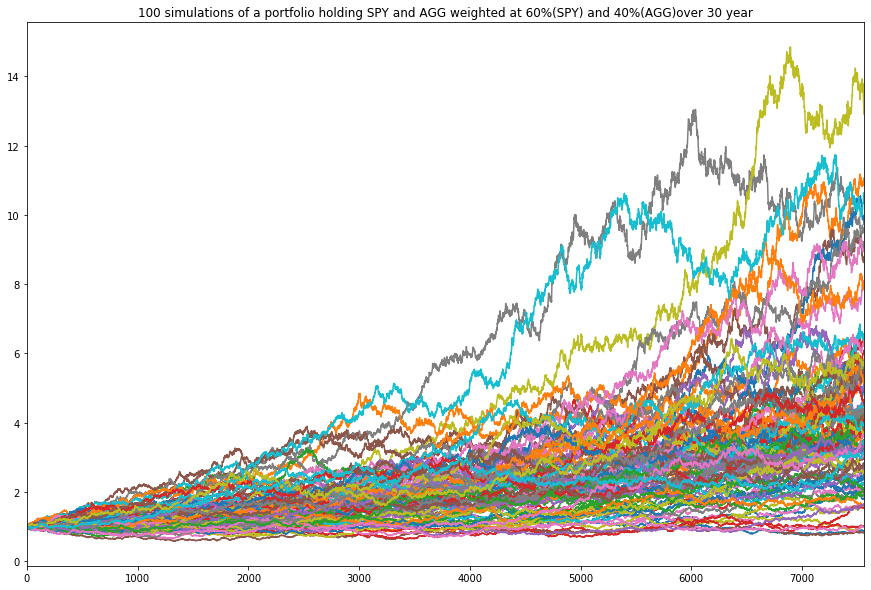

In [543]:
# Visualize the Simulation
# YOUR CODE HERE
monte_carlo.plot(legend=None, title="100 simulations of a portfolio holding SPY and AGG weighted at 60%(SPY) and 40%(AGG)over 30 year", figsize=(15,10))
plt.savefig("monte_carlo.png", bbox_inches ="tight")

In [544]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
# use -1 since we start at 0
final_returns = monte_carlo.iloc[-1,:]
final_returns.head()

0    4.908214
1    3.805957
2    5.841506
3    6.377609
4    5.494850
Name: 7560, dtype: float64

In [545]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
twenty_year_returns = monte_carlo.iloc[5039, :]
twenty_year_returns.head()

0    2.152067
1    2.513344
2    1.776552
3    2.886512
4    3.184752
Name: 5039, dtype: float64

In [546]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
ninety_pct_confidence_interval = final_returns.quantile(q=[0.05, 0.95])
ninety_pct_confidence_interval

0.05    1.504729
0.95    9.192365
Name: 7560, dtype: float64

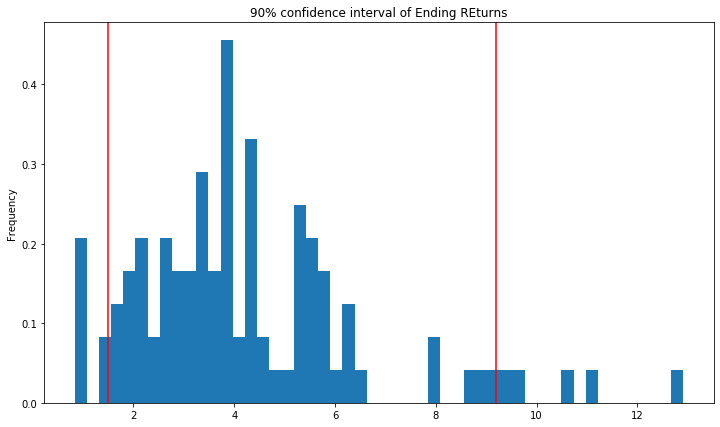

In [547]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
final_returns.plot(kind="hist",density=True, bins=50, figsize = (12,7), title = "90% confidence interval of Ending REturns")
plt.axvline(ninety_pct_confidence_interval.iloc[0], color= "r")
plt.axvline(ninety_pct_confidence_interval.iloc[1], color = "r")
plt.savefig("final_returns.png", bbox_inches = "tight")

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [548]:
# YOUR CODE HERE
confidence_interval = final_returns.quantile(q = [0.10, .50, 0.90])
tenth = initial_investment + (initial_investment * confidence_interval.iloc[0])
fiftieth = initial_investment + (initial_investment * confidence_interval.iloc[1])
nintieth = initial_investment + (initial_investment * confidence_interval.iloc[2])
print(confidence_interval)

print(f"""Expected cumulative returns at 30 years:
10th percentile = ${tenth:,.2f}
50th percentile = ${fiftieth:,.2f} 
90th percentile = ${nintieth:,.2f}
""")



0.1    1.790004
0.5    3.821439
0.9    6.687042
Name: 7560, dtype: float64
Expected cumulative returns at 30 years:
10th percentile = $55,800.09
50th percentile = $96,428.78 
90th percentile = $153,740.84



### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [549]:
# YOUR CODE HERE
#initial investmetn
initial_investment = 20000
# 10th percentile returns
expected_returns_tenth_percentile = initial_investment + (initial_investment * confidence_interval.iloc[0])
#50th percentile returns
expected_returns_fiftieth_percentile = initial_investment + (initial_investment * confidence_interval.iloc[1])
#90th percentile returns
expected_returns_nintieth_percentile = initial_investment + (initial_investment * confidence_interval.iloc[2])

print(f"""
Cummulative returns at 30 years with an initial investmet of $20,000:
10th percentile = ${expected_returns_tenth_percentile:,.2f}
50th percentile = ${expected_returns_fiftieth_percentile:,.2f}
90th percentile = ${expected_returns_nintieth_percentile:,.2f}
""")


Cummulative returns at 30 years with an initial investmet of $20,000:
10th percentile = $55,800.09
50th percentile = $96,428.78
90th percentile = $153,740.84



### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [550]:
# YOUR CODE HERE
#calculate portfolio amount at 90% confidence return with 30 year cumulative return 
#then calculate portfolio amount at 90%
thirty_yr_confidenceinterval = final_returns.quantile(q=[0.05, 0.95])

lower_range = round(initial_investment + (initial_investment * thirty_yr_confidenceinterval.iloc[0]),2)
upper_range = round(initial_investment + (initial_investment * thirty_yr_confidenceinterval.iloc[1]),2)
#withdraw rate
                    
withdraw_rate=0.04

# calculate values of withdraw rate for 90% confidence returns and 10th percentile.
ninetieth_withdraw_lower = round((lower_range * withdraw_rate), 2)
ninetieth_withdraw_upper = round((upper_range * withdraw_rate), 2)
tenth_percentile_withdraw= round((expected_returns_tenth_percentile * withdraw_rate) ,2)


                    

      


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [551]:
# YOUR CODE HERE
increased_initial_investment=3000

new_tenth_percentile_investment = round(increased_initial_investment + (increased_initial_investment * tenth),2)

#calculate portfolio amount at 10th percentile with a 50% increase
new_investment_lower = round(increased_initial_investment + (increased_initial_investment * thirty_yr_confidenceinterval.iloc[0]),2)
new_investment_upper = round(increased_initial_investment +(increased_initial_investment * thirty_yr_confidenceinterval.iloc[1]),2)

#calculate Values of the with draw rate for 90% confidence returns and 10th percentile returns at a 50% increase
new_nintieth_lower_withdraw = round((new_investment_lower * withdraw_rate),2)
new_ninetieth_upper_withdraw = round((new_investment_upper * withdraw_rate), 2)
new_tenth_percentile_withdraw =round((new_tenth_percentile_investment * withdraw_rate),2)

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [552]:
# YOUR CODE HERE